In [1]:
import torch
from diffusers.utils import make_image_grid
from diffusers import DDPMPipeline, DDPMScheduler


def evaluate(pipeline: DDPMPipeline):
    images = pipeline(
        batch_size=1,
    ).images
    # Make a grid out of the images
    image_grid = make_image_grid(images, rows=1, cols=1)
    return image_grid

In [2]:
from model import UNet2DModel, UNet2DConfig
config = UNet2DConfig()
config.sample_size = 64
model = UNet2DModel(config=config).eval().cuda()
model.load_state_dict(torch.load('../weights/unet-2d.pth', map_location='cuda'))

<All keys matched successfully>

In [3]:
pipeline = DDPMPipeline(unet=model, scheduler=model.noise_scheduler)

  0%|          | 0/1000 [00:00<?, ?it/s]

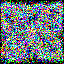

In [4]:
evaluate(pipeline)